### Calculation of DOS


In [1]:
from siman import header
from siman.SSHTools import SSHTools
from siman.calc_manage import add_loop, res_loop
from siman.database import write_database, read_database
from siman.set_functions import read_vasp_sets
from siman.dos_functions import plot_dos
%matplotlib inline
read_database()
header.PATH2PROJECT    = 'topologic' # path to project relative to your home folder on cluster
header.PATH2POTENTIALS = '/home/aksenov/scientific_projects/PAW_PBE_VASP' #path to VASP POTENTIALS
header.varset['static'].potdir = {83:'Bi_pv', 34:'Se'} #subfolders with required potentials
header.ssh_object = SSHTools()
header.ssh_object.setup(user="d.aksenov",host="10.30.16.168",pkey="/home/aksenov/.ssh/id_rsa")

/home/aksenov/simanrc.py was read


In [2]:
#Creating new set 'dos' with parameters for DOS calculations
dos_pack = {'NSW':0, 'LORBIT':12, 
            'ISMEAR':-5, 'LAECHG':'.TRUE.', 
            'EMIN':-10, 'EMAX':14, 
            'NEDOS':2000, 'KSPACING':0.15, 
            'savefile':'d'}
read_vasp_sets([('dos', 'static',dos_pack, 'override')]) #new set 'dos' from 'static'


Attention! You have chosen to override set dos
 

Warning! You did not change  NSW  in dos set
 



{'aks': <siman.set_functions.InputSet at 0x7f7dd12d26a0>,
 'dos': <siman.set_functions.InputSet at 0x7f7e00434358>,
 'ion_relax': <siman.set_functions.InputSet at 0x7f7dd12d80b8>,
 'opt': <siman.set_functions.InputSet at 0x7f7dd12d2518>,
 'static': <siman.set_functions.InputSet at 0x7f7dd12d2630>}

In [4]:
add_loop('Bi2Se3', 'dos', 1, input_geo_file = 'Bi2Se3_mp-541837_computed.POSCAR', run = 0) # calculting DOS

-- You provided the following geo file explicitly  Bi2Se3_mp-541837_computed.POSCAR ; Version of file does not matter, I use *curver*= 1 as a new version 

-- check_kpoints(): Kpoint   mesh is:  [12, 12, 12] 

-- check_kpoints(): The actual k-spacings are  [ 0.15  0.15  0.15] 

-- Attention! ngkpt =  [12, 12, 12]  is adopted from struct_des which you provided for it  Bi2Se3  and kspacing =  0.15 

    
    Calculation ('Bi2Se3', 'dos', 1) successfully created
    
     



'Bi2Se3'

In [5]:
res_loop('Bi2Se3', ['dos'], [1]) #reading results
write_database() # writing database

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- Bi2Se3.dos.1                  |  -20.1559  |    10.27;10.27;10.27    |  -687,-688,-649    |   1,13, 13    

Database has been successfully updated



-- ------Start plot_dos()----- 

-- Bi2Se3.dos.1 e_fermi 4.2271 



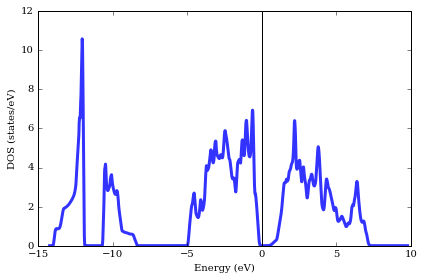

{'name': 'Bi2Se3.dos.1'}

In [6]:
plot_dos(header.db['Bi2Se3', 'dos', 1], dostype = 'total', up =1) #plotting total DOS; files saved in DOS folder

In [4]:
header.calc['Bi2Se3', 'dos', 1].end.get_elements() # just showing list of elements in cell

['Bi', 'Bi', 'Se', 'Se', 'Se']

-- ------Start plot_dos()----- 

-- Bi2Se3.dos.1 e_fermi 4.2271 



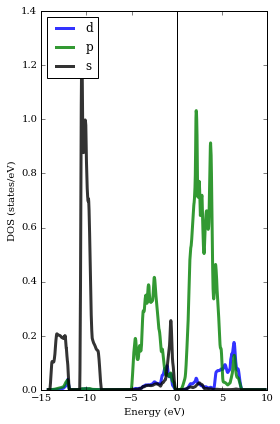

{'name': 'Bi2Se3.dos.1'}

In [3]:
plot_dos(header.calc['Bi2Se3', 'dos', 1], iatom = 1, dostype = 'partial', orbitals = ['s', 'p', 'd']) #plotting for atom 1